In [1]:
from Beam_trace import *

In [742]:
def create_77_150_d():
    s=lens_system(10)
    s.surfaces=[]

    s.add_surface(surface(40,1/2000.,1,1.514))
    s.add_surface(surface(40+3.5,1/5100.6 ,1.514,1))
    #convex f=300
    s.add_surface(surface(80,1/150.,1,1.514))
    s.add_surface(surface(80+11.8,-1/150.,1.514,1))
    #f=150 achromat
    s.add_surface(surface(165,1.202212070209180000E-2 ,1,1.514))
    s.add_surface(surface(165+20,-1.386577925679420000E-002 ,1.514,1.6656))
    s.add_surface(surface(165+23,-4.037141703673800000E-003 ,1.6656,1))
    #f=150 achromat
    s.add_surface(surface(190,1.202212070209180000E-2 ,1,1.514))
    s.add_surface(surface(190+20,-1.386577925679420000E-002 ,1.514,1.6656))
    s.add_surface(surface(190+23,-4.037141703673800000E-003 ,1.6656,1))

    s.add_surface(surface(220,5.0e-7,1,1.456))
    s.add_surface(surface(226.6,1.0e-7,1.456,1))
    s.add_surface(surface(290,0.0001,1,1.1))
    return s
def create_monoachromat(R0,R1,R2,R3):
    s=lens_system(5)
    s.surfaces=[]
    s.add_surface(surface(300,1/70.2,1,1.514))
    s.add_surface(surface(300+3.5,-1/3000,1.514,1))

    s.add_surface(surface(40,-1/R0,1,1.514))
    s.add_surface(surface(40+3.5,1/R1 ,1.514,1))
    #convex f=300
    s.add_surface(surface(80,1/R2,1,1.514))
    s.add_surface(surface(80+6.7,-1/R3,1.514,1))
    #s.add_surface(surface(180,1/10000,1,1.514))
    #s.add_surface(surface(180+3.5,1/77.2,1.514,1))
   
    #f=75 achromat
    s.add_surface(surface(390,0.0196850393700787,1,1.66))
    s.add_surface(surface(390+20,-0.0239865675221876,1.66,1.7258))
    s.add_surface(surface(390+23,-0.0040371417036738,1.7258,1))

    s.add_surface(surface(420,5.0e-7,1,1.456))
    s.add_surface(surface(426.6,1.0e-7,1.456,1))
    s.add_surface(surface(490,0.0001,1,1.1))
    return s
def create_doppelachromat(R0,R1,R2,R3):
    s=lens_system(5)
    s.surfaces=[]
  
    s.add_surface(surface(40,-1/R0,1,1.514))
    s.add_surface(surface(40+3.5,1/R1 ,1.514,1))
    #convex f=300
    s.add_surface(surface(80,1/R2,1,1.514))
    s.add_surface(surface(80+6.7,-1/R3,1.514,1))
    #s.add_surface(surface(180,1/10000,1,1.514))
    #s.add_surface(surface(180+3.5,1/77.2,1.514,1))
   #f=250 achromat
    #s.add_surface(surface(365, 7.294478080093399900E-003   ,1,1.5139))
    #s.add_surface(surface(365+20, -8.953353030709999500E-003   ,1.5139,1.6411))
    #s.add_surface(surface(365+23, -2.177700348432099900E-003  ,1.6411,1))

    #f=150 achromat
    #s.add_surface(surface(365,1.202212070209180000E-2 ,1,1.514))
    #s.add_surface(surface(365+20,-1.386577925679420000E-002 ,1.514,1.6656))
    #s.add_surface(surface(365+23,-4.037141703673800000E-003 ,1.6656,1))
    #f=150 achromat
    #s.add_surface(surface(390,1.202212070209180000E-2 ,1,1.514))
    #s.add_surface(surface(390+20,-1.386577925679420000E-002 ,1.514,1.6656))
    #s.add_surface(surface(390+23,-4.037141703673800000E-003 ,1.6656,1))
    #f=100 achromat
    s.add_surface(surface(390, 1.406074240719910000E-002  ,1,1.665))
    s.add_surface(surface(390+20,-2.263980076975320000E-002  ,1.665,1.7196))
    s.add_surface(surface(390+23, -2.754062241806699900E-003  ,1.7196,1))

    s.add_surface(surface(420,5.0e-7,1,1.456))
    s.add_surface(surface(426.6,1.0e-7,1.456,1))
    s.add_surface(surface(490,0.0001,1,1.1))
    return s

In [695]:

#optrimize lens system
def optimize_lenses_ff(x):
    p1=x[0]
    p4=x[1]
    p5=0
#    ls.surfaces[0].pos=p1-20
#    ls.surfaces[1].pos=p1-17
    ls.surfaces[0].pos=p1
    ls.surfaces[1].pos=p1+3.5
    #biconvex
    ls.surfaces[2].pos=p4+p1
    ls.surfaces[3].pos=p4+11.8+p1
    err3=0
    if(p4<14):
        err3=1
    ls.calculate_marginal()
    mpoint=ls.marginal_ray.Q_p[-4,0,1]
    #mpoint=max(ls.marginal_ray.Q_p[:,0,1])
    ls.entrance_pupil = ls.entrance_pupil*17.7/mpoint
    ls.calculate_marginal()
    res=ls.circle_of_least_confusion()
    #print(res,x)
    rr=res[1]
    return rr+err3




In [383]:
def defaultplot(zoom):
    print(ls.surfaces[3].R)
    plt.figure(figsize=(15,10))
    ls.plot()
    ls.calculate_marginal()
    CLC=ls.circle_of_least_confusion()
    print(CLC)
    offset=0.09*0
    bb=beam_field()        
    bb.rectangular_grid(1,250,ls.entrance_pupil,0.002*0)
    bb.propagate(ls.surfaces)
    bb.plot(color='black')
    ls.calculate_marginal()
    ls.marginal_ray.plot(color='red',lw=1)
    if zoom >0:
        plt.xlim(CLC[0]-5*zoom,CLC[0]+5*zoom)
        plt.ylim(-1*zoom+offset,1*zoom+offset)
    #plt.xlim(112.9,113.1)
    #plt.ylim(10,25)
    plt.show()
    print(ls.entrance_pupil)

 final_simplex: (array([[ 198.28991089,   29.57611084],
       [ 198.28991089,   29.57611084],
       [ 198.28991089,   29.57611084]]), array([ 0.00302511,  0.00335584,  0.00335584]))
           fun: 0.0030251060943822239
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 400
           nit: 122
        status: 1
       success: False
             x: array([ 198.28991089,   29.57611084])
<bound method surface.R of <Beam_trace.surface object at 0x7f9be28d4048>>
(530.06135727675792, 0.0033558428888937897)


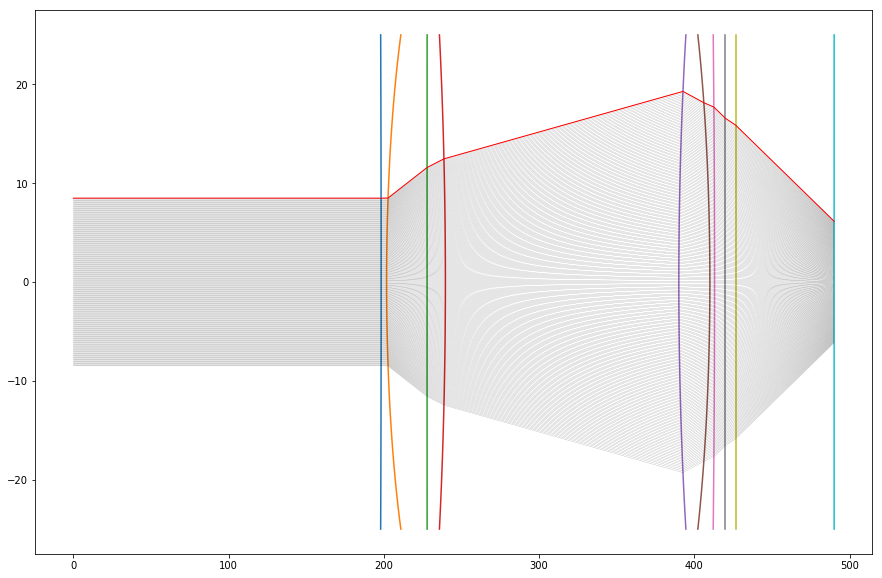

8.48343133185


In [780]:
ls=create_doppelachromat(1000,38.6,1/0.0001,1/0.012)
res=minimize(optimize_lenses_ff,([177,42]), method='Nelder-Mead',tol=1e-4)
print(res)
defaultplot(0)

-99


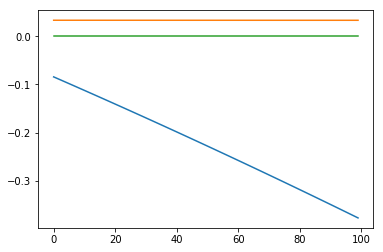

<bound method surface.R of <Beam_trace.surface object at 0x7f9be0c8ae80>>
(500.90514508074921, 0.033311426197995431)


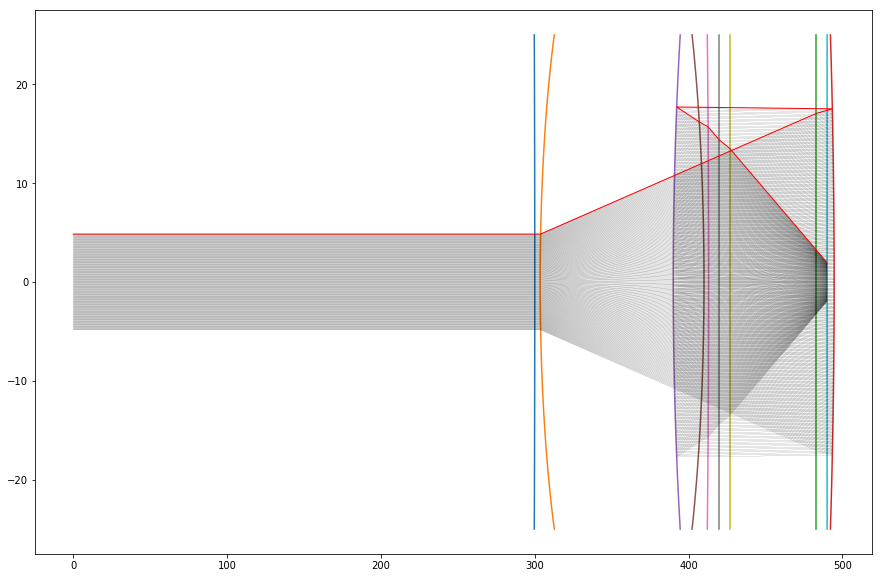

4.84829015426


In [796]:
def optimize_lenses_ff2(ls,x):
    p1=x[0]
    p4=x[1]
  #  ls.surfaces[0].pos=p1-13
  #  ls.surfaces[1].pos=p1-10
    ls.surfaces[0].pos=p1
    ls.surfaces[1].pos=p1+3.5
    ls.surfaces[2].pos=p4+p1
    ls.surfaces[3].pos=p4+11.8+p1
    ls.calculate_marginal()
    mpoint=ls.marginal_ray.Q_p[-4,0,1]
    ls.entrance_pupil = ls.entrance_pupil*15.7/mpoint
    osc=sum(ls.OSC(-0.0074887)[:-1])
    res=ls.circle_of_least_confusion()
    rr=res[1]
    return rr,osc
dat=[]
x=np.linspace(10,300,100)
#ls=create_monoachromat(38.6,-1/0.020,1/0.030)
#ls=create_monoachromat(70,51,1/0.00000001,1/0.013)
#ls=create_monoachromat(-75,-5000,-50,6000)
#ls=create_monoachromat(-7000,38.6,400000,80)
#ls=create_monoachromat(-700005,38.6,400000,65.3)
ls=create_doppelachromat(1000,38.6,100003,130)
for k in x:
    rr,osc=optimize_lenses_ff2(ls,[k,(130-38.6)*2])
    dat.append([rr,osc])

dat=np.array(dat)
plt.plot(dat[:,1])
plt.plot(dat[:,0])
plt.plot(x*0)
print(np.argmin(dat[:,1]**2)-np.argmin(dat[:,0]**2))
plt.show()
defaultplot(0)

In [24]:
ls

<bound method surface.R of <Beam_trace.surface object at 0x7f9be282bef0>>
(492.4811017402962, 0.0086661091328821271)


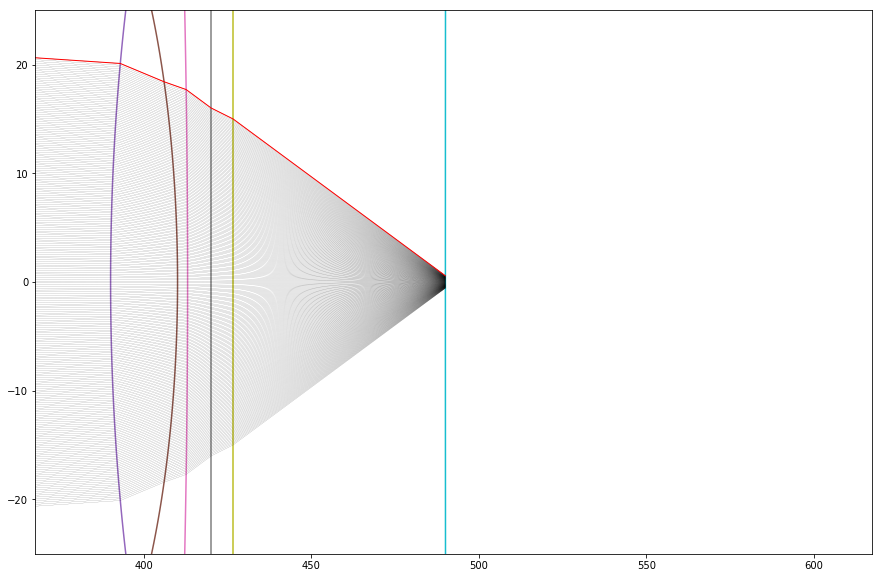

11.1456496799


array([ -1.03426819e-05,   4.26755333e-01,  -6.78827415e-02,
        -2.98880638e-01,  -1.05171367e-01,   2.61072402e-01,
        -2.41472696e-01,   1.07002624e-01,  -1.00215933e-01,
         1.26195212e-03])

In [774]:
defaultplot(25)
ls.OSC(-0.0074887)